In [70]:
#Import needed libraries
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

In [71]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [73]:
Base = automap_base()

In [74]:
Base.prepare(engine, reflect=True)

In [75]:
xls = pd.ExcelFile('electric_vehicle_data.xlsx') #specify the workbook I want parsed.
xls.sheet_names #print sheetnames so I know it's working.

['6-9 to 6-13',
 '6-16 to 6-20',
 '6-23 to 6-27',
 '6-30 to 7-4',
 '7-9 to 7-11',
 '7-14 to 7-18']

In [76]:
# frame_1 = pd.read_excel('electric_vehicle_data.xlsx', sheet_name="6-9 to 6-13")
frame_1 = pd.DataFrame()
print(type(frame_1))
for s in xls.sheet_names:
    print(s)
    frame_1 = frame_1.append(pd.read_excel('electric_vehicle_data.xlsx', sheet_name=s), sort=False)
    frame_1.head(2)
    

<class 'pandas.core.frame.DataFrame'>
6-9 to 6-13
6-16 to 6-20
6-23 to 6-27
6-30 to 7-4
7-9 to 7-11
7-14 to 7-18


In [83]:
frame_1.to_csv("vehicles.csv")

from sqlalchemy_utils import create_database, database_exists, drop_database

rds_connection_string = "postgresql://<user_id>:<password>@localhost:5432/ev_test_db"
engine = create_engine(rds_connection_string)

if database_exists(engine.url):
    # Delete PostgreSQL database 
    drop_database(engine.url)
    # Create empty PostgreSQL database
    create_database(engine.url)
else:
    create_database(engine.url)
    
    
frame_1.to_sql('table_name', engine)


inspected_df = frame_1.sort_values(by=["Last Inspected"])
sort_by_inspect_1 = inspected_df.drop(["Date", "Origin", "Ticket", "Vehicle ID", "Ticket Sub-1", "Ticket Sub-2", "Addt'l Note"], axis=1)
sort_by_inspect_1.head(15)

In [78]:
x_axis_data_1 = sort_by_inspect_1["Last Inspected"]
y_axis_data_1_front = sort_by_inspect_1["Front PSI"]
y_axis_data_1_rear = sort_by_inspect_1["Rear PSI"]

In [79]:
x_axis = np.arange(0, 41, 1)
y_axis = np.arange(5,35,1)

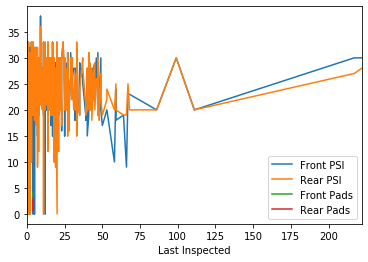

In [80]:
plot_to_print = sort_by_inspect_1.plot(x="Last Inspected")

/Users/jtoney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys


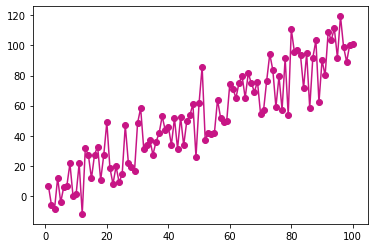

In [81]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
 
# plot
plt.plot( 'x', 'y', data=df, marker='o', color='mediumvioletred')


In [82]:
sheet_to_df_map

NameError: name 'sheet_to_df_map' is not defined

In [ ]:
df = pd.read_excel(xls, '6-9 to 6-13')
front_psi_1 = df.iloc[:,7]
front_psi_1.head(2)
#creating lists of the values for the individual front tire pressure readings

In [ ]:
front_psi_list_1 = []
for x in front_psi_1:
    front_psi_list_1.append(x)
front_psi_list_1    

In [ ]:
df = pd.read_excel(xls, '6-9 to 6-13')
rear_psi_1 = df.iloc[:,8]
rear_psi_1.head(2)

In [ ]:
rear_psi_list_1 = []
for x in rear_psi_1:
    rear_psi_list_1.append(x)
rear_psi_list_1    

In [ ]:
df = pd.read_excel(xls, '6-9 to 6-13')
days_since_1 = df.iloc[:,3]
days_since_1.head(2)
#creating lists of the values for the 'Days Since Last Inspected' column

In [ ]:
days_since_series_1 = pd.Series(days_since_1)
front_psi_series_1 = pd.Series(front_psi_list_1)
rear_psi_series_1 = pd.Series(rear_psi_list_1)

In [ ]:
days_since_series_1.describe()

In [ ]:
sheet_to_df_map = {}
result = pd.DataFrame()
for sheet_name in xls.sheet_names:
    result = result.append(xls.parse(sheet_name))
    
print(result.head())
#for loop to allow for dynamic parsing of the workbook. Adding sheets won't break the code.    

result = result.sort_values(by='Last Inspected', ascending=False)

In [ ]:
lim = result.plot(kind='line',y='Front PSI',x='Last Inspected',color='red')
lim.set_xlim(50, 0)
lim.set_ylim(12,35)
plt.show()

In [ ]:
sheet_to_df_map